In [1]:
import sqlite3
import matplotlib.pyplot as plt
import haversine as hs
import pandas as pd
import numpy as np
from math import sqrt, pow

In [2]:
def f(x):
    t_flat, t_flong, a_flat, a_flong = x[0], x[1], x[2], x[3]
    return sqrt(pow(12.36,2) + pow(hs.haversine((t_flat, t_flong), (a_flat, a_flong), unit=hs.Unit.METERS),2))

def g(df):
    df['distance'] = df.iloc[:, 2:6].apply(f, axis=1)
    return df.drop(columns=['T_FLAT', 'T_FLONG', 'A_FLAT', 'A_FLONG'])

In [3]:
conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_1.db")
rssi_1_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_1_exp5 = g(pd.read_sql("SELECT * FROM exp5", conn))
rssi_1_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))


conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_2.db")
rssi_2_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_2_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))


conn = sqlite3.connect("C:\\School\\rssi_ranging\\data_analysis\\rssi_3.db")
rssi_3_exp4 = g(pd.read_sql("SELECT * from exp4", conn))
rssi_3_exp6 = g(pd.read_sql("SELECT * FROM exp6", conn))


df = pd.concat([rssi_3_exp4, rssi_1_exp5, rssi_1_exp6, rssi_2_exp6, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True).groupby('distance')['RSSI'].mean()


print(rssi_1_exp4)

       RSSI  SNR   FREQ  SF     distance
0      -134  -13  863.5   9  1600.281074
1      -134  -13  863.5   9  1600.281074
2      -134  -13  863.5   9  1600.281074
3      -135  -14  863.5   9  1600.281074
4      -133  -12  863.5   9  1600.281074
...     ...  ...    ...  ..          ...
51267  -114    4  863.5  11   359.527048
51268  -114    4  863.5  11   359.527048
51269  -117    0  863.5  11   359.527048
51270  -117    1  863.5  11   359.527048
51271  -116    2  863.5  11   359.527048

[51272 rows x 5 columns]


ValueError: operands could not be broadcast together with shapes (144549,) (5,) 

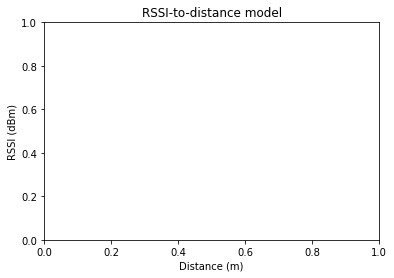

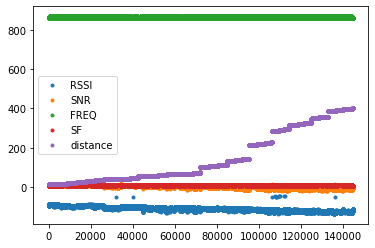

In [7]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")

df.plot(style='.')

d, rssi = df.index.tolist(), df.values.tolist()
popt = np.polyfit(d, rssi, 2)
xn = np.linspace(min(d), max(d), len(d))
yn = np.polyval(popt, xn)
plt.plot(xn, yn)
plt.semilogx()

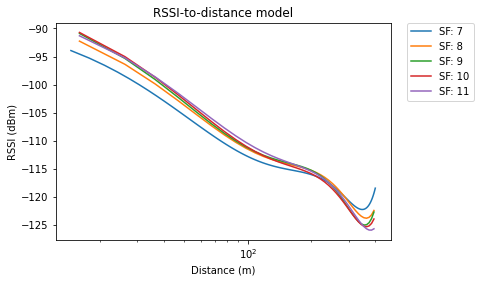

In [5]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df = pd.concat([rssi_1_exp5, rssi_1_exp6, rssi_2_exp6, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
for sf in range(7,12):
    df2 = df.loc[df['SF'] == sf].groupby('distance')['RSSI'].mean()
    d, rssi = df2.index.tolist(), df2.values.tolist()
    popt = np.polyfit(d, rssi, 4)
    xn = np.linspace(min(d), max(d), len(d))
    yn = np.polyval(popt, xn)
    plt.plot(xn, yn, label="SF: " + str(sf))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.semilogx()




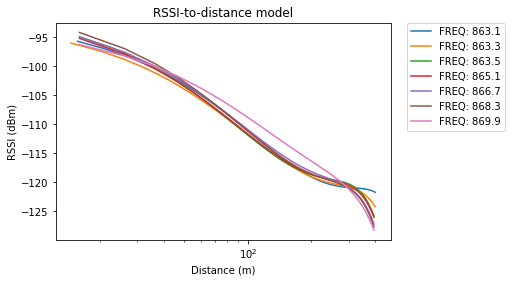

In [6]:
plt.title("RSSI-to-distance model")
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distance (m)")
df = pd.concat([rssi_1_exp5, rssi_1_exp6, rssi_2_exp6, rssi_3_exp6]).sort_values(by=['distance'], ignore_index=True)
for freq in sorted(df.FREQ.unique()):
    df2 = df.loc[df['FREQ'] == freq].groupby('distance')['RSSI'].mean()
    d, rssi = df2.index.tolist(), df2.values.tolist()
    popt = np.polyfit(d, rssi, 3)
    xn = np.linspace(min(d), max(d), len(d))
    yn = np.polyval(popt, xn)
    plt.plot(xn, yn, label="FREQ: " + str(freq))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.semilogx()